In [1]:
import numpy as np
import pandas as pd

In [2]:
imb_data = pd.read_csv('imbalanced_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'imbalanced_data.csv'

In [4]:
imb_data.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
imb_data['label'].value_counts()

,count
label,
0,29720
1,2242


In [6]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

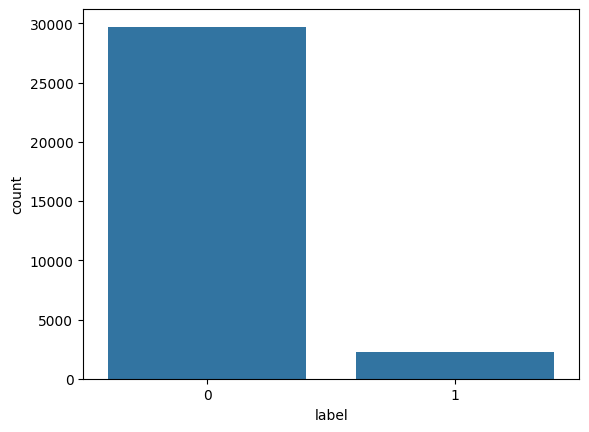

In [7]:
sns.countplot(x="label",data=imb_data)

- 0 -----> No hate
- 1 -----> Hate

In [8]:
imb_data.shape

(31962, 3)

In [9]:
imb_data.isnull().sum()

,0
id,0
label,0
tweet,0


In [10]:
imb_data.drop("id",inplace=True,axis=1)

In [11]:
imb_data.head(5)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [12]:
raw_data = pd.read_csv('raw_data.csv')

In [13]:
raw_data.head(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
raw_data['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [15]:
raw_data.shape

(24783, 7)

In [16]:
raw_data.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [17]:
raw_data.drop(["Unnamed: 0", "count", "hate_speech", "offensive_language", "neither"], axis=1, inplace=True)

In [18]:
raw_data.head(5)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [19]:
raw_data['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

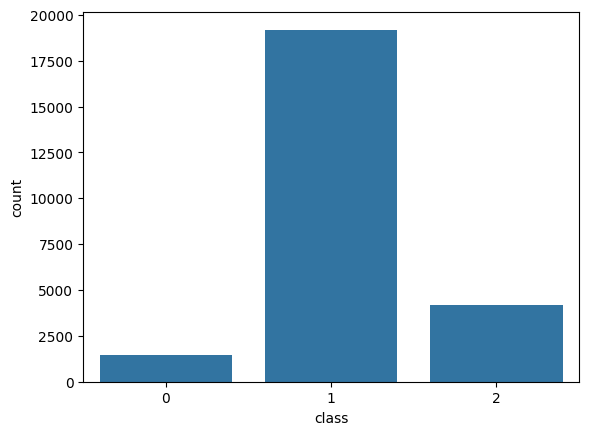

In [20]:
sns.countplot(x="class", data=raw_data)

- class 0: hate
- class 1: abusive
- class 2: no hate

In [21]:
raw_data.loc[raw_data['class'] == 0, 'class'] = 1

In [22]:
raw_data['class'].unique()

array([2, 1])

<Axes: xlabel='class', ylabel='count'>

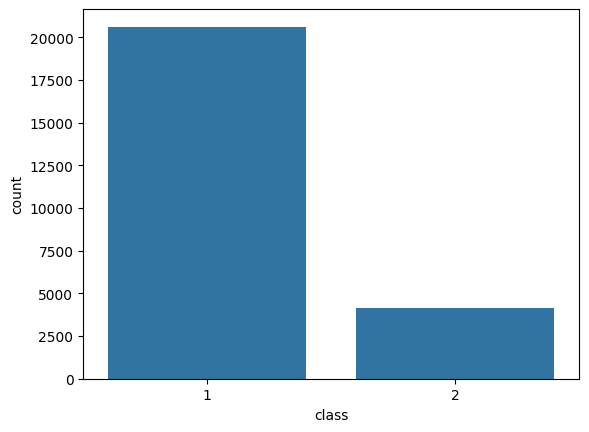

In [23]:
sns.countplot(x="class", data=raw_data)

In [24]:
raw_data['class'].replace({2:0}, inplace=True)

/tmp/ipython-input-24-492426180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['class'].replace({2:0}, inplace=True)


In [25]:
raw_data['class'].unique()

array([0, 1])

In [26]:
raw_data.rename(columns={'class':'label'}, inplace=True)

In [27]:
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [28]:
df = pd.concat([imb_data, raw_data])

In [29]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [30]:
df.shape

(56745, 2)

In [31]:
df['label'].value_counts()

,count
label,
0,33883
1,22862


<Axes: xlabel='label', ylabel='count'>

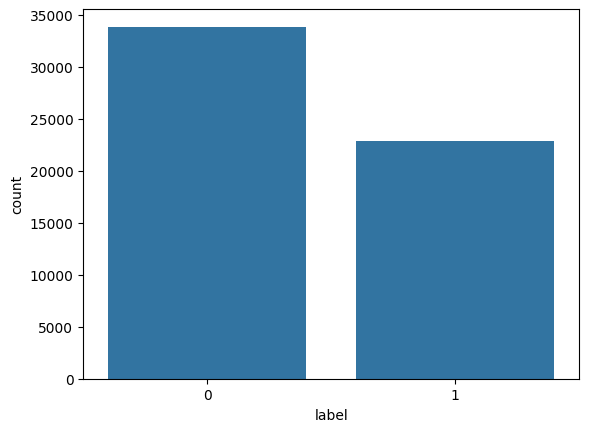

In [32]:
sns.countplot(x="label", data=df)

## Preprocessing

In [33]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [34]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [ ]:
# Let's apply regex and do cleaning.
import logging


def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [w for w in words.split(' ') if w not in stopword]
    words = " ".join(words)
    words = [stemmer.stem(w) for w in words.split(' ')]
    words = " ".join(words)
    return words

In [84]:
df['tweet'] = df['tweet'].apply(data_cleaning)

In [85]:
df['tweet'][1]

,tweet
1,user user thank lyft credit cant use caus dont...
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...


In [86]:
X = df['tweet']
y = df['label']

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Engineering

In [89]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [90]:
max_word = 50000
max_len = 300

tokenizer = Tokenizer(num_words = max_word)
tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_len)

In [91]:
train_padded.shape

(45396, 300)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Activation
from tensorflow.keras.optimizers import RMSprop

In [93]:
model = Sequential()
model.add(Embedding(max_word, 128, input_length = max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True))
model.add(LSTM(64, dropout = 0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(loss = "binary_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
history = model.fit(train_padded, y_train, epochs=1, batch_size=128, validation_split=0.2)

284/284 ━━━━━━━━━━━━━━━━━━━━ 572s 2s/step - accuracy: 0.8632 - loss: 0.3086 - val_accuracy: 0.9430 - val_loss: 0.1653


In [95]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'epoch')

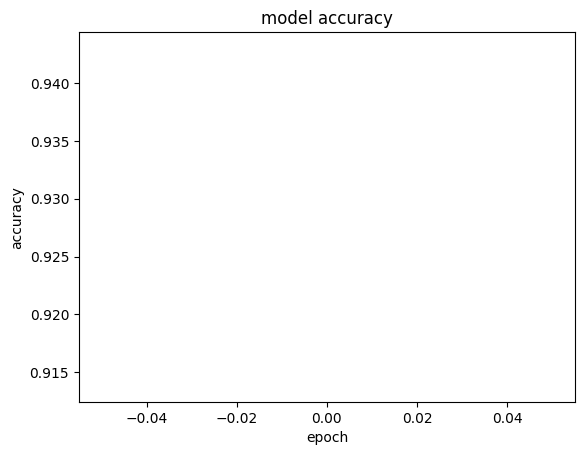

In [96]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [97]:
tokenizer = Tokenizer(num_words = max_word)
tokenizer.fit_on_texts(X_test)

test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_len)

In [98]:
test_padded

array([[ 3435,  1302,   744, ...,   997,     2,  3435],
       [  672,   563,  6208, ...,  1674,  6209,  3205],
       [    0,     0,     0, ...,   154,   201,   851],
       ...,
       [    0,     0,     0, ..., 16406, 16407, 16408],
       [    0,     0,     0, ...,    25,   233,   234],
       [    0,     0,     0, ...,   201,   226, 17875]], dtype=int32)

In [99]:
test_padded.shape

(11349, 300)

In [100]:
accr = model.evaluate(test_padded, y_test)

355/355 ━━━━━━━━━━━━━━━━━━━━ 113s 317ms/step - accuracy: 0.7812 - loss: 0.5832


In [101]:
lstm_prediction = model.predict(test_padded)

355/355 ━━━━━━━━━━━━━━━━━━━━ 113s 317ms/step


In [102]:
res = []
for pred in lstm_prediction:
  if pred[0] < 0.5:
    res.append(0)
  else:
    res.append(1)

In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
print(confusion_matrix(y_test, res))

[[5822  914]
 [1595 3018]]


In [105]:
import pickle

with open('tokenizer.pickle', 'wb') as f:
  pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

In [106]:
import keras

In [107]:
keras.saving.save_model(model, 'my_model.keras')

In [108]:
load_model = keras.models.load_model('my_model.keras')

with open("tokenizer.pickle", "rb") as f:
  load_tokenizer = pickle.load(f)

In [109]:
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [w for w in words.split(' ') if w not in stopword]
    words = " ".join(words)
    words = [stemmer.stem(w) for w in words.split(' ')]
    words = " ".join(words)

    return words

In [135]:
text = "i love machine learning"
text = [data_cleaning(text)]
print(text)

['love machin learn']


In [136]:
seq = load_tokenizer.texts_to_sequences(text)
padd_seq = pad_sequences(seq, maxlen=max_len)

In [137]:
pred = load_model.predict(padd_seq)
if pred < 0.5:
  print(" no Hate")
else:
  print("Hate")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
 no Hate
